In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/cancer_classification.csv')

In [0]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


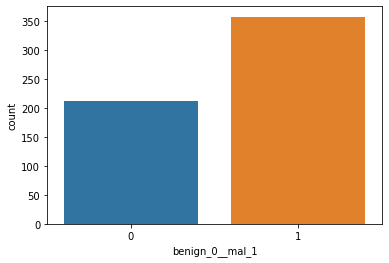

In [0]:
sns.countplot(x='benign_0__mal_1',data=df)

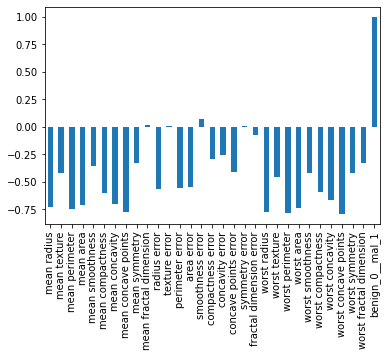

In [0]:
df.corr()['benign_0__mal_1'].plot(kind='bar')

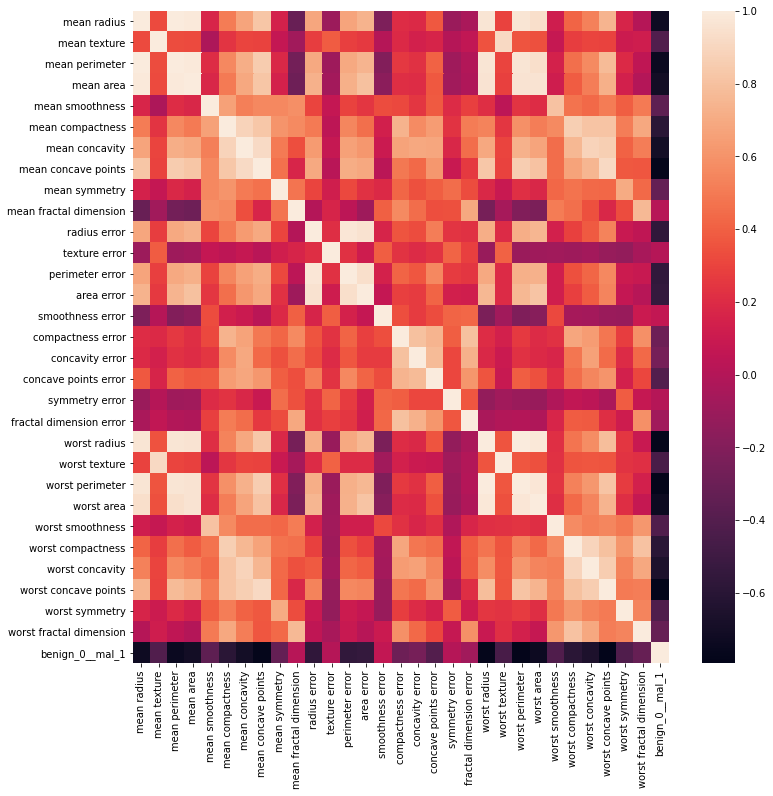

In [0]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [0]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [0]:
X_train.shape

(426, 30)

In [0]:
type(y_train)

numpy.ndarray

In [0]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer= 'adam', metrics=['accuracy'])

In [0]:
model.fit(x=X_train,y=y_train,epochs = 600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6594 - accuracy: 0.6033 - val_loss: 0.6489 - val_accuracy: 0.6713
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.7183 - val_loss: 0.6163 - val_accuracy: 0.7203
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.8474 - val_loss: 0.5801 - val_accuracy: 0.8252
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.8685 - val_loss: 0.5390 - val_accuracy: 0.8392
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4934 - accuracy: 0.8897 - val_loss: 0.4946 - val_accuracy: 0.8811
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4452 - accuracy: 0.9038 - val_loss: 0.4493 - val_accuracy: 0.8951
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 0.9038 - val_loss: 0.4066 - val_accuracy: 0.8951
Epoch 8/600
1

In [0]:
loss=pd.DataFrame(model.history.history)

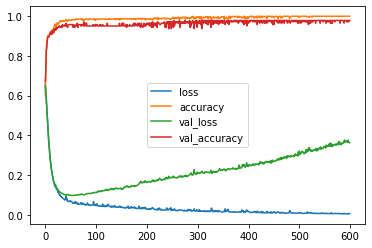

In [0]:
loss.plot()

In [0]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer= 'adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be 'loss', and mode would be 'min'. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Example:
 |  
 |  >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 |  >>> # This callback will stop the training when there is no improvement in
 |  >>> # the validation loss for three consecutive epochs.
 |  >>> model 

In [0]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.659438,0.603286,0.648920,0.671329
1,0.623855,0.718310,0.616324,0.720280
2,0.581387,0.847418,0.580110,0.825175
3,0.536943,0.868545,0.539038,0.839161
4,0.493414,0.889671,0.494580,0.881119
...,...,...,...,...
595,0.004296,1.000000,0.364776,0.972028
596,0.006312,1.000000,0.376488,0.979021
597,0.004938,1.000000,0.368240,0.972028
598,0.004152,1.000000,0.365574,0.979021


In [0]:
early_stop=EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=25)

In [0]:
model.fit(x=X_train,y=y_train,epochs = 600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6946 - accuracy: 0.6174 - val_loss: 0.6716 - val_accuracy: 0.6364
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6633 - accuracy: 0.6338 - val_loss: 0.6490 - val_accuracy: 0.6573
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6337 - accuracy: 0.6925 - val_loss: 0.6136 - val_accuracy: 0.7273
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.7887 - val_loss: 0.5715 - val_accuracy: 0.8112
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.8146 - val_loss: 0.5226 - val_accuracy: 0.8252
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.8545 - val_loss: 0.4669 - val_accuracy: 0.8671
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.8850 - val_loss: 0.4088 - val_accuracy: 0.8811
Epoch 8/600
1

In [0]:
loss1=pd.DataFrame(model.history.history)

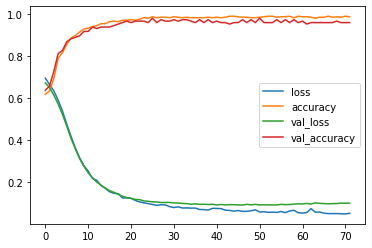

In [0]:
loss1.plot()

In [0]:

model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer= 'adam', metrics=['accuracy'])

In [0]:
model.fit(x=X_train,y=y_train,epochs = 600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7217 - accuracy: 0.4742 - val_loss: 0.7030 - val_accuracy: 0.3007
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5657 - val_loss: 0.6849 - val_accuracy: 0.6993
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5728 - val_loss: 0.6661 - val_accuracy: 0.8462
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6831 - val_loss: 0.6470 - val_accuracy: 0.8671
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6737 - val_loss: 0.6289 - val_accuracy: 0.8671
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6250 - accuracy: 0.7066 - val_loss: 0.6073 - val_accuracy: 0.8601
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6114 - accuracy: 0.7559 - val_loss: 0.5812 - val_accuracy: 0.8322
Epoch 8/600
1

In [0]:
loss2=pd.DataFrame(model.history.history)

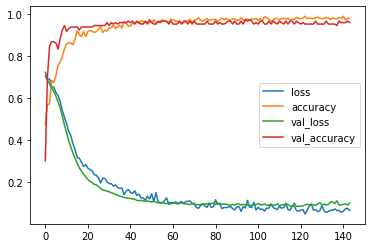

In [0]:
loss2.plot()

In [0]:
pred=model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix


In [0]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.98      0.96      0.97        91

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [0]:
 print(confusion_matrix(y_test,pred))

[[50  2]
 [ 4 87]]
